# Playing with RBF

In [1695]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import keras
from keras.models import *
from keras.layers import *
from keras import backend as K
import tensorflow as tf
from keras import losses
import matplotlib.pyplot as plt
import seaborn as sns
from rbf_basis import RBFLayer
from rbf_basis import InitCentersRandom

# First order ODE

$$\frac{\delta y}{\delta x} = 1$$

In [1]:
x = np.linspace(0,1,100000)
labels = np.ones(100000)
#rbflayer = RBFLayer(1, betas=1.0, initializer=initializerise, input_shape=(1,))(x1)

NameError: name 'np' is not defined

In [1761]:
def gradient( y, x , give_name):
    return Lambda( lambda z: K.gradients( z[0], z[1] ), output_shape = [1], name = give_name)( [ y, x ] )

x1= Input(shape=(1,))
rbflayer = RBFLayer(100, betas=100, input_shape=(1,))(x1)
mid = Dense(100, activation='sigmoid',  kernel_initializer='random_uniform' )(rbflayer)
mid2 = Dense(100, activation='sigmoid',  kernel_initializer='random_uniform' )(mid)
y = Dense(1, activation='sigmoid',  kernel_initializer='random_uniform' )(mid2)
g1 = gradient( y, x1 , "dudx1")
g11 = gradient( g1,x1,"dudxx1")
loss = Add()([g1,y])
model = Model(inputs=x1,outputs=[y,g1,g11,loss])

losses = {
	"dudx1": "mean_squared_error",
}

model.compile(loss=losses, optimizer='adam')

C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Output "dense_171" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "dense_171" during training.
C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Output "dudxx1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "dudxx1" during training.
C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Output "add_135" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "add_135" during training.


In [1762]:
model.fit(x,labels,epochs=5,batch_size=500, verbose=1, shuffle=True)

Epoch 1/5
100000/100000 [==============================] - 17s 174us/step - loss: 0.2067 - dudx1_loss: 0.2067
Epoch 2/5
100000/100000 [==============================] - 4s 45us/step - loss: 0.0094 - dudx1_loss: 0.0094
Epoch 3/5
100000/100000 [==============================] - 4s 45us/step - loss: 0.0060 - dudx1_loss: 0.0060
Epoch 4/5
100000/100000 [==============================] - 5s 45us/step - loss: 0.0048 - dudx1_loss: 0.0048
Epoch 5/5
100000/100000 [==============================] - 5s 46us/step - loss: 0.0042 - dudx1_loss: 0.0042


## Impose boundary conditions

$$ y[0] = 0 $$

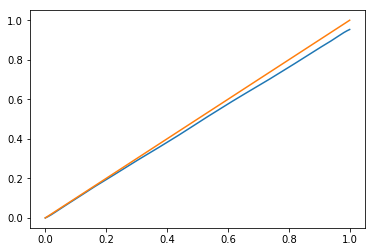

In [1763]:
sol=model.predict(x)[0]-model.predict(x)[0][0]
plt.plot(x,sol)
plt.plot(x, x);

# Second order ODE

$$\frac{\delta^2 y}{\delta x^2} = 1$$

In [1790]:
x = np.linspace(0,1,100000)
labels = np.ones(100000)
#rbflayer = RBFLayer(1, betas=1.0, initializer=initializerise, input_shape=(1,))(x1)

In [1791]:
def gradient( y, x , give_name):
    return Lambda( lambda z: K.gradients( z[0], z[1] ), output_shape = [1], name = give_name)( [ y, x ] )

x1= Input(shape=(1,))
rbflayer = RBFLayer(100, betas=1, input_shape=(1,))(x1)
mid = Dense(100, activation='sigmoid',  kernel_initializer='random_uniform')(rbflayer)
mid2 = Dense(100, activation='sigmoid',  kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01) )(mid)
y = Dense(1, activation='sigmoid', kernel_initializer='random_uniform')(mid2)
g1 = gradient( y, x1 , "dudx1")
g11 = gradient( g1,x1,"dudxx1")
loss = Add()([g1,y])
model = Model(inputs=x1,outputs=[y,g1,g11,loss])

losses = {
	"dudxx1": "mean_squared_error",
}

optimizer_rms = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

model.compile(loss=losses, optimizer=optimizer_rms)

C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Output "dense_195" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "dense_195" during training.
C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Output "dudx1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "dudx1" during training.
C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Output "add_143" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "add_143" during training.


In [1792]:
model.fit(x,labels,epochs=2, batch_size=200, verbose=1, shuffle=True);

Epoch 1/2
100000/100000 [==============================] - ETA: 0s - loss: 0.0761 - dudxx1_loss: 0.0454- ETA: 7s - loss: 0.0915 - dudxx1_loss: - 31s 307us/step - loss: 0.0759 - dudxx1_loss: 0.0453
Epoch 2/2
100000/100000 [==============================] - 16s 163us/step - loss: 0.0160 - dudxx1_loss: 0.0076


## Impose boundary conditions

$$ y[0]= 0 $$, $$y[1]= 0$$

In [1793]:
x = np.linspace(0,1,100)
xin=np.linspace(0,1,2)
yin=np.linspace(0,1,2)
yin[0]= model.predict(x)[0][0]
yin[1]= model.predict(x)[0][99]

In [1794]:
xvals = np.linspace(0, 1, 100)
yinterp = np.interp(xvals, xin, yin)

In [1795]:
sol=model.predict(x)[0].flatten()-yinterp

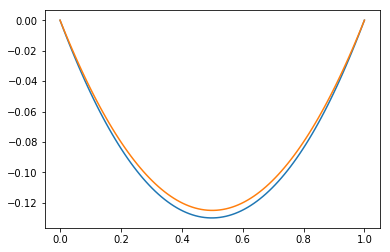

In [1796]:
plt.plot(x,sol)
plt.plot(x,0.5*(x*x-x))

# First order ODE - complex

$$\frac{dy}{dx}= \pi  (3 \cos (6 \pi  x)-\cos (2 \pi  x)) $$

$$y(x)=\sin (2 \pi  x) \cos (4 \pi  x)+1$$

In [1873]:
x = np.linspace(0,1,100000)
labels = np.pi*(3*np.cos(6*np.pi*x)-np.cos(2*np.pi*x))

In [1874]:
def gradient( y, x , give_name):
    return Lambda( lambda z: K.gradients( z[0], z[1] ), output_shape = [1], name = give_name)( [ y, x ] )

# x1= Input(shape=(1,))
# rbflayer = RBFLayer(20, betas=100, input_shape=(1,))(x1)
x1= Input(shape=(1,))
rbflayer = RBFLayer(100, betas=100, input_shape=(1,))(x1)
mid = Dense(100, activation='sigmoid',  kernel_initializer='random_uniform')(rbflayer)
mid2 = Dense(10, activation='sigmoid',  kernel_initializer='random_uniform')(mid)
mid3 = Dense(10, activation='sigmoid',  kernel_initializer='random_uniform')(mid2)
y = Dense(1, activation='sigmoid', kernel_initializer='random_uniform' )(mid3)
g1 = gradient( y, x1 , "dudx1")
model = Model(inputs=x1,outputs=[y,g1])

losses = {
	"dudx1": "mean_squared_error",
}

model.compile(loss=losses, optimizer='adam')

C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Output "dense_277" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "dense_277" during training.


In [1876]:
model.fit(x,labels,epochs=5, batch_size=500, verbose=1, shuffle=True);

Epoch 1/5
100000/100000 [==============================] - 5s 52us/step - loss: 4.4696 - dudx1_loss: 4.4696
Epoch 2/5
100000/100000 [==============================] - 5s 52us/step - loss: 4.1617 - dudx1_loss: 4.1617
Epoch 3/5
100000/100000 [==============================] - 5s 53us/step - loss: 3.9423 - dudx1_loss: 3.9423
Epoch 4/5
100000/100000 [==============================] - 5s 54us/step - loss: 3.7796 - dudx1_loss: 3.7796
Epoch 5/5
100000/100000 [==============================] - 5s 54us/step - loss: 3.6501 - dudx1_loss: 3.6501 


## Impose boundary conditions

$$ y[0]= 1 $$

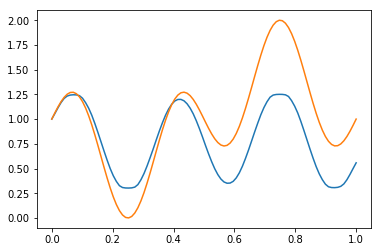

In [1877]:
x = np.linspace(0,1,100)
xreal=np.linspace(0,1,100)
yreal=np.sin(2*np.pi*xreal)*np.cos(4*np.pi*xreal)+1

plt.plot(x,model.predict(x)[0]+(1-model.predict(x)[0][0]))
plt.plot(xreal,yreal)

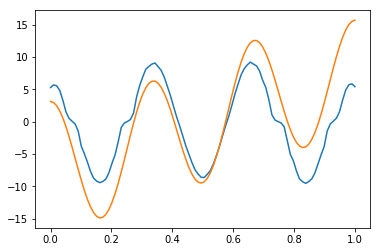

In [1878]:
plt.plot(x,model.predict(x)[1])

plt.plot(x,np.pi*(3*np.cos(6*np.pi*x)-2*np.cos(np.pi*x)))

# Test example 1, just predict y - no gradient

In [68]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import RMSprop
from rbf_basis import RBFLayer, InitCentersRandom
import matplotlib.pyplot as plt

def gradient( y, x , give_name):
    return Lambda( lambda z: K.gradients( z[0], z[1] ), output_shape = [1], name = give_name)( [ y, x ] )

x_in= Input(shape=(1,))
rbflayer = RBFLayer(1000, betas=100.0, input_shape=(1,))(x_in)
y_out = Dense(1,name="out")(rbflayer)

g1 = gradient( y_out, x_in , "dudx1")

model = Model(inputs=x_in,outputs=[y_out,g1])

losses = {
	"out": "mean_squared_error",
}

model.compile(loss=losses, optimizer=RMSprop())


C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Output "dudx1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "dudx1" during training.


In [72]:
X = np.linspace(0,1,1000)
y = np.pi*(3*np.cos(6*np.pi*X)-2*np.cos(np.pi*X))

model.fit(X, y,
          batch_size=100,
          epochs=1000,
          verbose=1)

Epoch 1/1000
1000/1000 [==============================] - 0s 20us/step - loss: 2602.9500 - out_loss: 2602.9500
Epoch 2/1000
1000/1000 [==============================] - 0s 21us/step - loss: 2496.8851 - out_loss: 2496.8851
Epoch 3/1000
1000/1000 [==============================] - 0s 21us/step - loss: 2491.7137 - out_loss: 2491.7137
Epoch 4/1000
1000/1000 [==============================] - 0s 24us/step - loss: 2566.8584 - out_loss: 2566.8584
Epoch 5/1000
1000/1000 [==============================] - 0s 24us/step - loss: 2658.5123 - out_loss: 2658.5123
Epoch 6/1000
1000/1000 [==============================] - 0s 24us/step - loss: 2617.2446 - out_loss: 2617.2446
Epoch 7/1000
1000/1000 [==============================] - 0s 26us/step - loss: 2567.7904 - out_loss: 2567.7904
Epoch 8/1000
1000/1000 [==============================] - 0s 24us/step - loss: 2619.9096 - out_loss: 2619.9096
Epoch 9/1000
1000/1000 [==============================] - 0s 24us/step - loss: 2482.5615 - out_loss: 2482.5615
E

1000/1000 [==============================] - 0s 26us/step - loss: 2678.6705 - out_loss: 2678.6705
Epoch 147/1000
1000/1000 [==============================] - ETA: 0s - loss: 2423.1582 - out_loss: 2423.15 - 0s 26us/step - loss: 2363.0173 - out_loss: 2363.0173
Epoch 148/1000
1000/1000 [==============================] - 0s 27us/step - loss: 2449.5877 - out_loss: 2449.5877
Epoch 149/1000
1000/1000 [==============================] - 0s 31us/step - loss: 2678.4364 - out_loss: 2678.4364
Epoch 150/1000
1000/1000 [==============================] - 0s 28us/step - loss: 2640.5203 - out_loss: 2640.5203
Epoch 151/1000
1000/1000 [==============================] - 0s 25us/step - loss: 2441.6990 - out_loss: 2441.6990
Epoch 152/1000
1000/1000 [==============================] - 0s 22us/step - loss: 2539.1597 - out_loss: 2539.1597
Epoch 153/1000
1000/1000 [==============================] - 0s 25us/step - loss: 2553.4148 - out_loss: 2553.4148
Epoch 154/1000
1000/1000 [==============================] - 0s 

1000/1000 [==============================] - 0s 27us/step - loss: 2611.6365 - out_loss: 2611.6365
Epoch 291/1000
1000/1000 [==============================] - 0s 28us/step - loss: 2585.4520 - out_loss: 2585.4520
Epoch 292/1000
1000/1000 [==============================] - 0s 27us/step - loss: 2601.3840 - out_loss: 2601.3840
Epoch 293/1000
1000/1000 [==============================] - 0s 29us/step - loss: 2687.5863 - out_loss: 2687.5863
Epoch 294/1000
1000/1000 [==============================] - 0s 28us/step - loss: 2268.3683 - out_loss: 2268.3683
Epoch 295/1000
1000/1000 [==============================] - 0s 26us/step - loss: 2761.8066 - out_loss: 2761.8066
Epoch 296/1000
1000/1000 [==============================] - 0s 26us/step - loss: 2380.2188 - out_loss: 2380.2188
Epoch 297/1000
1000/1000 [==============================] - 0s 28us/step - loss: 2730.8882 - out_loss: 2730.8882
Epoch 298/1000
1000/1000 [==============================] - 0s 25us/step - loss: 2494.8362 - out_loss: 2494.836

1000/1000 [==============================] - 0s 26us/step - loss: 2485.9852 - out_loss: 2485.9852
Epoch 435/1000
1000/1000 [==============================] - 0s 25us/step - loss: 2733.3482 - out_loss: 2733.3482
Epoch 436/1000
1000/1000 [==============================] - 0s 24us/step - loss: 2478.3073 - out_loss: 2478.3073
Epoch 437/1000
1000/1000 [==============================] - 0s 26us/step - loss: 2359.3105 - out_loss: 2359.3105
Epoch 438/1000
1000/1000 [==============================] - 0s 24us/step - loss: 2730.5594 - out_loss: 2730.5594
Epoch 439/1000
1000/1000 [==============================] - 0s 26us/step - loss: 2481.9662 - out_loss: 2481.9662
Epoch 440/1000
1000/1000 [==============================] - 0s 27us/step - loss: 2533.9133 - out_loss: 2533.9133
Epoch 441/1000
1000/1000 [==============================] - 0s 24us/step - loss: 2562.8888 - out_loss: 2562.8888
Epoch 442/1000
1000/1000 [==============================] - 0s 26us/step - loss: 2611.0210 - out_loss: 2611.021

1000/1000 [==============================] - 0s 26us/step - loss: 2759.2504 - out_loss: 2759.2504
Epoch 579/1000
1000/1000 [==============================] - 0s 26us/step - loss: 2260.5810 - out_loss: 2260.5810
Epoch 580/1000
1000/1000 [==============================] - 0s 29us/step - loss: 2584.6947 - out_loss: 2584.6947
Epoch 581/1000
1000/1000 [==============================] - 0s 33us/step - loss: 2672.7387 - out_loss: 2672.7387
Epoch 582/1000
1000/1000 [==============================] - 0s 30us/step - loss: 2554.7242 - out_loss: 2554.7242
Epoch 583/1000
1000/1000 [==============================] - 0s 31us/step - loss: 2480.9430 - out_loss: 2480.9430
Epoch 584/1000
1000/1000 [==============================] - 0s 31us/step - loss: 2618.5765 - out_loss: 2618.5765
Epoch 585/1000
1000/1000 [==============================] - 0s 26us/step - loss: 2502.9497 - out_loss: 2502.9497
Epoch 586/1000
1000/1000 [==============================] - 0s 23us/step - loss: 2372.3164 - out_loss: 2372.316

1000/1000 [==============================] - 0s 27us/step - loss: 2495.7232 - out_loss: 2495.7232
Epoch 723/1000
1000/1000 [==============================] - 0s 25us/step - loss: 2400.9510 - out_loss: 2400.9510
Epoch 724/1000
1000/1000 [==============================] - 0s 24us/step - loss: 2764.3139 - out_loss: 2764.3139
Epoch 725/1000
1000/1000 [==============================] - 0s 27us/step - loss: 2572.3452 - out_loss: 2572.3452
Epoch 726/1000
1000/1000 [==============================] - 0s 27us/step - loss: 2480.1938 - out_loss: 2480.1938
Epoch 727/1000
1000/1000 [==============================] - 0s 28us/step - loss: 2596.5643 - out_loss: 2596.5643
Epoch 728/1000
1000/1000 [==============================] - 0s 26us/step - loss: 2533.7992 - out_loss: 2533.7992
Epoch 729/1000
1000/1000 [==============================] - 0s 25us/step - loss: 2496.3142 - out_loss: 2496.3142
Epoch 730/1000
1000/1000 [==============================] - 0s 27us/step - loss: 2406.0159 - out_loss: 2406.015

1000/1000 [==============================] - 0s 24us/step - loss: 2697.1023 - out_loss: 2697.1023
Epoch 867/1000
1000/1000 [==============================] - 0s 27us/step - loss: 2366.6373 - out_loss: 2366.6373
Epoch 868/1000
1000/1000 [==============================] - 0s 26us/step - loss: 2653.5263 - out_loss: 2653.5263
Epoch 869/1000
1000/1000 [==============================] - 0s 25us/step - loss: 2577.9760 - out_loss: 2577.9760
Epoch 870/1000
1000/1000 [==============================] - 0s 27us/step - loss: 2475.2654 - out_loss: 2475.2654
Epoch 871/1000
1000/1000 [==============================] - 0s 32us/step - loss: 2455.1928 - out_loss: 2455.1928
Epoch 872/1000
1000/1000 [==============================] - 0s 32us/step - loss: 2601.4856 - out_loss: 2601.4856
Epoch 873/1000
1000/1000 [==============================] - 0s 30us/step - loss: 2596.8472 - out_loss: 2596.8472
Epoch 874/1000
1000/1000 [==============================] - 0s 32us/step - loss: 2473.9360 - out_loss: 2473.936

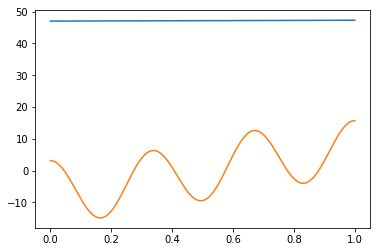

In [73]:
y_pred = model.predict(X)[0]
plt.plot(X,y_pred)
plt.plot(X,y)

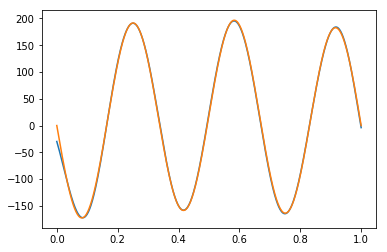

In [2206]:
y_pred_grad = model.predict(X)[1]
plt.plot(X,y_pred_grad)
plt.plot(X,np.pi*(2*np.pi*np.sin(np.pi*X)-18*np.pi*np.sin(6*np.pi*X)))

 # Test example 2,  IDRBF

$$\frac{dy}{dx}= -100 \sin (10 x)$$
$$ y(x) = c_1+10 \cos (10 x)$$

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import RMSprop
from rbf_basis import RBFLayer, InitCentersRandom
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import keras
from keras.models import *
from keras.layers import *
from keras import backend as K
import tensorflow as tf
from keras import losses
import matplotlib.pyplot as plt
import seaborn as sns
from rbf_basis import RBFLayer
from rbf_basis import InitCentersRandom

def gradient( y, x , give_name):
    return Lambda( lambda z: K.gradients( z[0], z[1] ), output_shape = [1], name = give_name)( [ y, x ] )

x_in= Input(shape=(1,))
rbflayer = RBFLayer(1000, betas=1.0, input_shape=(1,))(x_in)
y_out = Dense(1,name="out")(rbflayer)


g1 = gradient( y_out, x_in , "dudx1")

model = Model(inputs=x_in,outputs=[y_out,g1])

losses = {
	"out": "mean_squared_error",
}

model.compile(loss=losses, optimizer=RMSprop())

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Output "dudx1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "dudx1" during training.


In [3]:
X = np.linspace(0,1,1000)
y = -100*np.sin(10*X)
model.fit(X, y,
          batch_size=50,
          epochs=1000,
          verbose=1)

Epoch 1/1000
1000/1000 [==============================] - 0s 429us/step - loss: 4470.2886 - out_loss: 4470.2886
Epoch 2/1000
1000/1000 [==============================] - 0s 27us/step - loss: 4409.0502 - out_loss: 4409.0502
Epoch 3/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4412.6661 - out_loss: 4412.6661
Epoch 4/1000
1000/1000 [==============================] - 0s 24us/step - loss: 4411.7407 - out_loss: 4411.7407
Epoch 5/1000
1000/1000 [==============================] - 0s 25us/step - loss: 4407.1089 - out_loss: 4407.1089
Epoch 6/1000
1000/1000 [==============================] - 0s 25us/step - loss: 4408.0586 - out_loss: 4408.0586
Epoch 7/1000
1000/1000 [==============================] - 0s 25us/step - loss: 4404.2302 - out_loss: 4404.2302
Epoch 8/1000
1000/1000 [==============================] - 0s 27us/step - loss: 4407.1432 - out_loss: 4407.1432
Epoch 9/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4406.9256 - out_loss: 4406.9256


1000/1000 [==============================] - 0s 33us/step - loss: 4385.6373 - out_loss: 4385.6373
Epoch 75/1000
1000/1000 [==============================] - 0s 36us/step - loss: 4392.8227 - out_loss: 4392.8227
Epoch 76/1000
1000/1000 [==============================] - 0s 34us/step - loss: 4386.5227 - out_loss: 4386.5227
Epoch 77/1000
1000/1000 [==============================] - 0s 31us/step - loss: 4390.5492 - out_loss: 4390.5492
Epoch 78/1000
1000/1000 [==============================] - 0s 32us/step - loss: 4387.5635 - out_loss: 4387.5635
Epoch 79/1000
1000/1000 [==============================] - 0s 32us/step - loss: 4388.7427 - out_loss: 4388.7427
Epoch 80/1000
1000/1000 [==============================] - 0s 32us/step - loss: 4390.2117 - out_loss: 4390.2117
Epoch 81/1000
1000/1000 [==============================] - 0s 30us/step - loss: 4385.0267 - out_loss: 4385.0267
Epoch 82/1000
1000/1000 [==============================] - 0s 30us/step - loss: 4380.5736 - out_loss: 4380.5736
Epoch 

1000/1000 [==============================] - 0s 26us/step - loss: 4382.9651 - out_loss: 4382.9651
Epoch 147/1000
1000/1000 [==============================] - 0s 30us/step - loss: 4380.4137 - out_loss: 4380.4137
Epoch 148/1000
1000/1000 [==============================] - 0s 32us/step - loss: 4383.9734 - out_loss: 4383.9734
Epoch 149/1000
1000/1000 [==============================] - 0s 30us/step - loss: 4380.6686 - out_loss: 4380.6686
Epoch 150/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4384.5149 - out_loss: 4384.5149
Epoch 151/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4379.3549 - out_loss: 4379.3549
Epoch 152/1000
1000/1000 [==============================] - 0s 30us/step - loss: 4378.3361 - out_loss: 4378.3361
Epoch 153/1000
1000/1000 [==============================] - 0s 30us/step - loss: 4382.9677 - out_loss: 4382.9677
Epoch 154/1000
1000/1000 [==============================] - 0s 28us/step - loss: 4381.1343 - out_loss: 4381.134

1000/1000 [==============================] - 0s 26us/step - loss: 4375.8691 - out_loss: 4375.8691
Epoch 219/1000
1000/1000 [==============================] - 0s 25us/step - loss: 4371.3830 - out_loss: 4371.3830
Epoch 220/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4376.2901 - out_loss: 4376.2901
Epoch 221/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4370.0231 - out_loss: 4370.0231
Epoch 222/1000
1000/1000 [==============================] - 0s 24us/step - loss: 4378.4692 - out_loss: 4378.4692
Epoch 223/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4373.1627 - out_loss: 4373.1627
Epoch 224/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4378.3870 - out_loss: 4378.3870
Epoch 225/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4370.3903 - out_loss: 4370.3903
Epoch 226/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4375.3236 - out_loss: 4375.323

1000/1000 [==============================] - 0s 30us/step - loss: 4365.5646 - out_loss: 4365.5646
Epoch 291/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4374.5662 - out_loss: 4374.5662
Epoch 292/1000
1000/1000 [==============================] - 0s 28us/step - loss: 4366.1722 - out_loss: 4366.1722
Epoch 293/1000
1000/1000 [==============================] - 0s 25us/step - loss: 4378.1090 - out_loss: 4378.1090
Epoch 294/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4369.1044 - out_loss: 4369.1044
Epoch 295/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4375.5818 - out_loss: 4375.5818
Epoch 296/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4375.1497 - out_loss: 4375.1497
Epoch 297/1000
1000/1000 [==============================] - 0s 28us/step - loss: 4373.9074 - out_loss: 4373.9074
Epoch 298/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4366.9704 - out_loss: 4366.970

1000/1000 [==============================] - 0s 27us/step - loss: 4366.9760 - out_loss: 4366.9760
Epoch 363/1000
1000/1000 [==============================] - 0s 28us/step - loss: 4373.9399 - out_loss: 4373.9399
Epoch 364/1000
1000/1000 [==============================] - 0s 31us/step - loss: 4369.4946 - out_loss: 4369.4946
Epoch 365/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4366.6053 - out_loss: 4366.6053
Epoch 366/1000
1000/1000 [==============================] - 0s 28us/step - loss: 4364.7753 - out_loss: 4364.7753
Epoch 367/1000
1000/1000 [==============================] - 0s 25us/step - loss: 4370.5369 - out_loss: 4370.5369
Epoch 368/1000
1000/1000 [==============================] - 0s 27us/step - loss: 4367.4844 - out_loss: 4367.4844
Epoch 369/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4377.1082 - out_loss: 4377.1082
Epoch 370/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4362.9672 - out_loss: 4362.967

1000/1000 [==============================] - 0s 25us/step - loss: 4366.4726 - out_loss: 4366.4726
Epoch 435/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4365.9574 - out_loss: 4365.9574
Epoch 436/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4364.5878 - out_loss: 4364.5878
Epoch 437/1000
1000/1000 [==============================] - 0s 27us/step - loss: 4361.0968 - out_loss: 4361.0968
Epoch 438/1000
1000/1000 [==============================] - 0s 30us/step - loss: 4369.2140 - out_loss: 4369.2140
Epoch 439/1000
1000/1000 [==============================] - 0s 31us/step - loss: 4363.7645 - out_loss: 4363.7645
Epoch 440/1000
1000/1000 [==============================] - 0s 31us/step - loss: 4361.2462 - out_loss: 4361.2462
Epoch 441/1000
1000/1000 [==============================] - 0s 33us/step - loss: 4363.8362 - out_loss: 4363.8362
Epoch 442/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4364.6221 - out_loss: 4364.622

1000/1000 [==============================] - 0s 26us/step - loss: 4360.6775 - out_loss: 4360.6775
Epoch 507/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4361.1043 - out_loss: 4361.1043
Epoch 508/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4363.1707 - out_loss: 4363.1707
Epoch 509/1000
1000/1000 [==============================] - 0s 27us/step - loss: 4354.1182 - out_loss: 4354.1182
Epoch 510/1000
1000/1000 [==============================] - 0s 27us/step - loss: 4355.9622 - out_loss: 4355.9622
Epoch 511/1000
1000/1000 [==============================] - 0s 25us/step - loss: 4366.5393 - out_loss: 4366.5393
Epoch 512/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4362.4561 - out_loss: 4362.4561
Epoch 513/1000
1000/1000 [==============================] - 0s 27us/step - loss: 4360.7919 - out_loss: 4360.7919
Epoch 514/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4360.0303 - out_loss: 4360.030

1000/1000 [==============================] - 0s 27us/step - loss: 4360.7610 - out_loss: 4360.7610
Epoch 579/1000
1000/1000 [==============================] - 0s 28us/step - loss: 4357.4321 - out_loss: 4357.4321
Epoch 580/1000
1000/1000 [==============================] - 0s 28us/step - loss: 4358.9419 - out_loss: 4358.9419
Epoch 581/1000
1000/1000 [==============================] - 0s 28us/step - loss: 4359.5961 - out_loss: 4359.5961
Epoch 582/1000
1000/1000 [==============================] - 0s 27us/step - loss: 4358.9043 - out_loss: 4358.9043
Epoch 583/1000
1000/1000 [==============================] - 0s 27us/step - loss: 4355.7013 - out_loss: 4355.7013
Epoch 584/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4355.6929 - out_loss: 4355.6929
Epoch 585/1000
1000/1000 [==============================] - 0s 30us/step - loss: 4355.0894 - out_loss: 4355.0894
Epoch 586/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4357.4283 - out_loss: 4357.428

1000/1000 [==============================] - 0s 34us/step - loss: 4352.4757 - out_loss: 4352.4757
Epoch 651/1000
1000/1000 [==============================] - 0s 30us/step - loss: 4357.1105 - out_loss: 4357.1105
Epoch 652/1000
1000/1000 [==============================] - 0s 30us/step - loss: 4355.1083 - out_loss: 4355.1083
Epoch 653/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4351.5246 - out_loss: 4351.5246
Epoch 654/1000
1000/1000 [==============================] - 0s 28us/step - loss: 4353.8034 - out_loss: 4353.8034
Epoch 655/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4354.9624 - out_loss: 4354.9624
Epoch 656/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4354.8374 - out_loss: 4354.8374
Epoch 657/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4357.3617 - out_loss: 4357.3617
Epoch 658/1000
1000/1000 [==============================] - 0s 30us/step - loss: 4352.5446 - out_loss: 4352.544

1000/1000 [==============================] - 0s 34us/step - loss: 4348.4872 - out_loss: 4348.4872
Epoch 723/1000
1000/1000 [==============================] - 0s 34us/step - loss: 4349.8956 - out_loss: 4349.8956
Epoch 724/1000
1000/1000 [==============================] - 0s 35us/step - loss: 4350.9486 - out_loss: 4350.9486
Epoch 725/1000
1000/1000 [==============================] - 0s 30us/step - loss: 4344.9715 - out_loss: 4344.9715
Epoch 726/1000
1000/1000 [==============================] - 0s 30us/step - loss: 4349.9092 - out_loss: 4349.9092
Epoch 727/1000
1000/1000 [==============================] - 0s 31us/step - loss: 4350.0917 - out_loss: 4350.0917
Epoch 728/1000
1000/1000 [==============================] - 0s 31us/step - loss: 4351.4598 - out_loss: 4351.4598
Epoch 729/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4347.3694 - out_loss: 4347.3694
Epoch 730/1000
1000/1000 [==============================] - 0s 34us/step - loss: 4347.8562 - out_loss: 4347.856

1000/1000 [==============================] - 0s 26us/step - loss: 4345.0676 - out_loss: 4345.0676
Epoch 795/1000
1000/1000 [==============================] - 0s 27us/step - loss: 4344.4806 - out_loss: 4344.4806
Epoch 796/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4345.3604 - out_loss: 4345.3604
Epoch 797/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4348.7316 - out_loss: 4348.7316
Epoch 798/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4344.7725 - out_loss: 4344.7725
Epoch 799/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4349.0325 - out_loss: 4349.0325
Epoch 800/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4349.8277 - out_loss: 4349.8277
Epoch 801/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4344.6411 - out_loss: 4344.6411
Epoch 802/1000
1000/1000 [==============================] - 0s 31us/step - loss: 4345.2107 - out_loss: 4345.210

1000/1000 [==============================] - 0s 29us/step - loss: 4338.6132 - out_loss: 4338.6132
Epoch 867/1000
1000/1000 [==============================] - 0s 30us/step - loss: 4343.2776 - out_loss: 4343.2776
Epoch 868/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4344.1121 - out_loss: 4344.1121
Epoch 869/1000
1000/1000 [==============================] - 0s 27us/step - loss: 4341.3970 - out_loss: 4341.3970
Epoch 870/1000
1000/1000 [==============================] - 0s 27us/step - loss: 4344.7473 - out_loss: 4344.7473
Epoch 871/1000
1000/1000 [==============================] - 0s 28us/step - loss: 4338.4446 - out_loss: 4338.4446
Epoch 872/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4346.2160 - out_loss: 4346.2160
Epoch 873/1000
1000/1000 [==============================] - 0s 28us/step - loss: 4342.1338 - out_loss: 4342.1338
Epoch 874/1000
1000/1000 [==============================] - 0s 32us/step - loss: 4344.8413 - out_loss: 4344.841

1000/1000 [==============================] - 0s 27us/step - loss: 4337.8039 - out_loss: 4337.8039
Epoch 939/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4339.8240 - out_loss: 4339.8240
Epoch 940/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4332.9203 - out_loss: 4332.9203
Epoch 941/1000
1000/1000 [==============================] - 0s 27us/step - loss: 4343.5027 - out_loss: 4343.5027
Epoch 942/1000
1000/1000 [==============================] - 0s 26us/step - loss: 4343.5109 - out_loss: 4343.5109
Epoch 943/1000
1000/1000 [==============================] - 0s 27us/step - loss: 4336.6463 - out_loss: 4336.6463
Epoch 944/1000
1000/1000 [==============================] - 0s 27us/step - loss: 4339.0486 - out_loss: 4339.0486
Epoch 945/1000
1000/1000 [==============================] - 0s 29us/step - loss: 4337.8957 - out_loss: 4337.8957
Epoch 946/1000
1000/1000 [==============================] - 0s 28us/step - loss: 4339.7049 - out_loss: 4339.704

[54.40211108893698, array([55.758556], dtype=float32)]


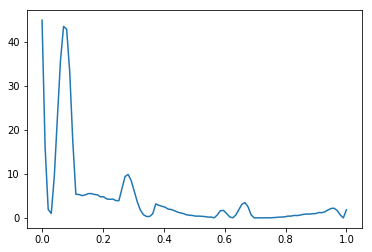

In [85]:
def truelabel(x):
    return -100*np.sin(10*x)

def lossfunc(x):
    return (model.predict([x])[0].flatten()-truelabel(x))**2

# test:
print([truelabel(1),model.predict([1])[0].flatten()])
plt.plot(np.linspace(0,1,100),lossfunc(np.linspace(0,1,100)))

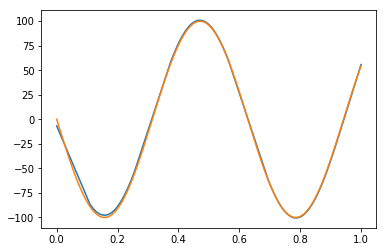

In [82]:
y_pred = model.predict(X)[0]
plt.plot(X,y_pred)
plt.plot(X,y)

In [31]:
def c(i):
    return model.get_weights()[0].flatten()[i]
def r2(x,i): 
    return (x-c(i))**2
def a(i):
    return model.get_weights()[1].flatten()[i]
def H(x,i):
    return (x-c(i))*np.sqrt(r2(x,i)+a(i)**2)/2+(r2(x,i)-(x-c(i))**2+a(i)**2)/2*np.log((x-c(i))+np.sqrt(r2(x,i)+a(i)**2))
def u(x):
    return np.dot(ui(x,np.arange(1000)),model.get_weights()[2].flatten())
ufunc = np.vectorize(u)

C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


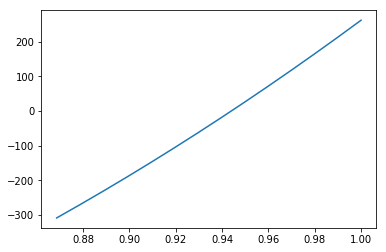

In [32]:
plt.plot(np.linspace(0,1,100),ufunc(np.linspace(0,1,100)))

In [2332]:
centers = model.get_weights()[0].flatten()
a2 = np.power(model.get_weights()[1].flatten(),2)

w = model.get_weights()[2].flatten()

def r2(x):
    return np.power(x-centers,2)

def u(x):
    return np.dot((r2(x)+a2)**1.5/6 + 
              (r2(x)-np.power(x-centers,2)+a2)/2*(x-centers)*np.log((x-centers)+np.sqrt(r2(x)+a2))-
              (r2(x)-np.power(x-centers,2)+a2)/2*np.sqrt(r2(x)+a2)
             ,w)

u(0.3)
#plt.plot(xin,u(xin))

26837048.0

# First order ODE - Complex - 100 RBF nodes

$$\frac{dy}{dx}= \pi  (-1 \cos (2 \pi  x)+ 0.5 \cos (6 \pi  x)) $$
$$y(x)\to\frac{1}{12} \sin (6 \pi  x)-\frac{1}{2} \sin (2 \pi  x)$$

C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Output "dense_140" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "dense_140" during training.


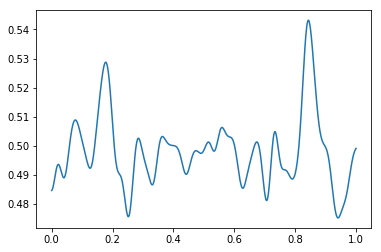

In [1626]:
x = np.linspace(0, 1, 1000)
labels = np.pi*(-1.0*np.cos(2*np.pi*x)+0.5*np.cos(6*np.pi*x))

def gradient( y, x , give_name):
    return Lambda( lambda z: K.gradients( z[0], z[1] ), output_shape = [1], name = give_name)( [ y, x ] )

x1= Input(shape=(1,))
rbflayer = RBFLayer(100, betas=2500, input_shape=(1,))(x1)
#m1=Dense(10,kernel_initializer='random_uniform')(x1)
# m2=Dense(10,activation='sigmoid',kernel_initializer='random_uniform')(m1)
# m3=Dense(10,activation='sigmoid',kernel_initializer='random_uniform')(m2)
y = Dense(1,activation='sigmoid',kernel_initializer='random_uniform')(rbflayer)
g1 = gradient( y, x1 , "dudx1")
model = Model(inputs=x1,outputs=[y,g1])

losses = {
	"dudx1": "mean_squared_error",
}

model.compile(loss=losses, optimizer='adam')

plt.plot(x,model.predict(x)[0])

In [1627]:
model.fit(x,labels,epochs=100,verbose=1,shuffle=True)
model.fit(x,labels,epochs=1,verbose=1,shuffle=True)

Epoch 1/100
1000/1000 [==============================] - 10s 10ms/step - loss: 6.3060 - dudx1_loss: 6.3060
Epoch 2/100
1000/1000 [==============================] - 0s 95us/step - loss: 5.5452 - dudx1_loss: 5.5452
Epoch 3/100
1000/1000 [==============================] - 0s 89us/step - loss: 5.0162 - dudx1_loss: 5.0162
Epoch 4/100
1000/1000 [==============================] - 0s 121us/step - loss: 4.6088 - dudx1_loss: 4.6088
Epoch 5/100
1000/1000 [==============================] - 0s 92us/step - loss: 4.2158 - dudx1_loss: 4.2158
Epoch 6/100
1000/1000 [==============================] - 0s 81us/step - loss: 3.9003 - dudx1_loss: 3.9003
Epoch 7/100
1000/1000 [==============================] - 0s 88us/step - loss: 3.6682 - dudx1_loss: 3.6682
Epoch 8/100
1000/1000 [==============================] - 0s 85us/step - loss: 3.4063 - dudx1_loss: 3.4063
Epoch 9/100
1000/1000 [==============================] - 0s 87us/step - loss: 3.1644 - dudx1_loss: 3.1644
Epoch 10/100
1000/1000 [====================

### Prediction (blue) vs Solution (orange)

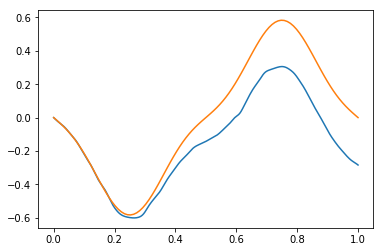

In [1567]:
xreal=np.linspace(0,1,100)
yreal=-0.5*np.sin(2*np.pi*xreal)+(1/12)*np.sin(6*np.pi*xreal)
plt.plot(x,model.predict(x)[0]-model.predict(x)[0][0])
plt.plot(xreal,yreal)

### The objective function match:

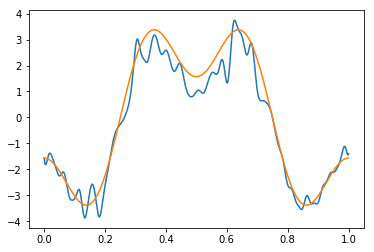

In [1568]:
plt.plot(x,model.predict(x)[1])
plt.plot(x,labels)

# Second order ODE - Complex

$$\frac{d^2y}{dx^2}= -100 \sin (10 x)$$
$$ y\to \sin (10 x)$$

C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Output "dense_236" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "dense_236" during training.
C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Output "dudx1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "dudx1" during training.


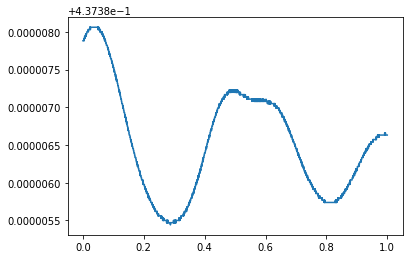

In [1843]:
x = np.linspace(0, 1, 100000)
labels = -100.0*np.sin(10*x)

def gradient( y, x , give_name):
    return Lambda( lambda z: K.gradients( z[0], z[1] ), output_shape = [1], name = give_name)( [ y, x ] )

x1= Input(shape=(1,))
rbflayer = RBFLayer(100, betas=100, input_shape=(1,))(x1)
mid = Dense(100, activation='sigmoid',  kernel_initializer='random_uniform')(rbflayer)
mid2 = Dense(100, activation='sigmoid',  kernel_initializer='random_uniform')(mid)
mid3 = Dense(100, activation='sigmoid',  kernel_initializer='random_uniform')(mid2)
mid4 = Dense(100, activation='sigmoid',  kernel_initializer='random_uniform')(mid3)
y = Dense(1,activation='sigmoid',kernel_initializer='random_uniform')(mid4)
g1 = gradient( y, x1 , "dudx1")
g11 = gradient( g1, x1, "dudxx11")
model = Model(inputs=x1,outputs=[y,g1,g11])

losses = {
	"dudxx11": "mean_squared_error",
}

model.compile(loss=losses, optimizer='adam')

plt.plot(x,model.predict(x)[0])

In [1844]:
model.fit(x,labels,epochs=5, batch_size=500, verbose=1, shuffle=True);

Epoch 1/5
100000/100000 [==============================] - 30s 302us/step - loss: 2193.3016 - dudxx11_loss: 2193.3016
Epoch 2/5
100000/100000 [==============================] - 12s 118us/step - loss: 1368.2598 - dudxx11_loss: 1368.2598s - loss: 1369.1565 - dudxx11_loss: 1369.
Epoch 3/5
100000/100000 [==============================] - 12s 117us/step - loss: 1333.5458 - dudxx11_loss: 1333.5458
Epoch 4/5
100000/100000 [==============================] - 12s 117us/step - loss: nan - dudxx11_loss: nan
Epoch 5/5
100000/100000 [==============================] - 12s 119us/step - loss: nan - dudxx11_loss: nan


### Objective function match

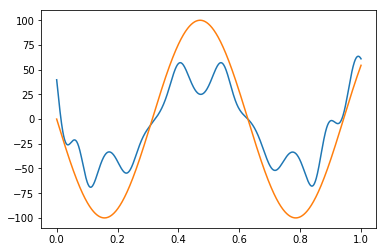

In [1663]:
plt.plot(x,model.predict(x)[2])
plt.plot(x,labels)

### Prediction (blue) vs Solution (orange)

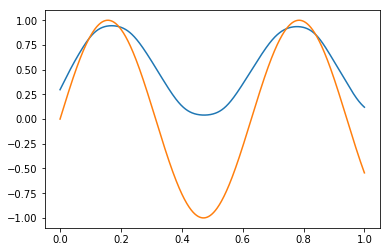

In [1662]:
plt.plot(x,model.predict(x)[0])
plt.plot(x,np.sin(10*x))

# PDE

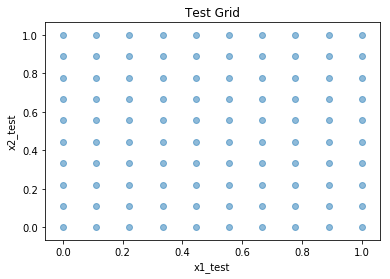

In [1609]:
x = np.linspace(0,1,10) 
x1_test = np.repeat(x,10)
x2_test = np.tile(x,10)
labels = np.zeros(100) 

# Plot
plt.scatter(x1_test, x2_test,alpha=0.5)
plt.title('Test Grid')
plt.xlabel('x1_test')
plt.ylabel('x2_test')
plt.show()

In [1611]:
def gradient( y, x , give_name):
    return Lambda( lambda z: K.gradients( z[0], z[1] ), output_shape = [1], name = give_name)( [ y, x ] )

x1=Input(shape=(1,))
x2=Input(shape=(1,))
xin = concatenate([x1,x2])
rbflayer = RBFLayer(100, betas=2500, input_shape=(2,))(xin)
y = Dense(1, name="out", activation='sigmoid',kernel_initializer='random_uniform')(rbflayer)
g1 = gradient( y, x1 , "dudx1")
g11 = gradient( g1,x1,"dudxx1")
g2 = gradient( y, x2 , "dudx2")
g22 = gradient( g2,x2,"dudxx2")
loss = Add(name = "loss")([g22,g11])

model = Model(inputs=[x1,x2],outputs=[y,g1,g11,g2,g22,loss])

losses = {
	"loss": "mean_squared_error",
}

model.compile(loss=losses, optimizer='adam', metrics=['accuracy'])

# model = Model( inputs = [ x1, x2, BC], outputs = [a,f,j] )
# pre_ans = model.predict( [x1_test, x2_test, BC_test], steps = 1 )

C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Output "out" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "out" during training.
C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Output "dudx1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "dudx1" during training.
C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Output "dudxx1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "dudxx1" during training.
C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Output "dudx2" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "dudx2" during training.
C:\Users\Freek\Anaconda3\lib\site-

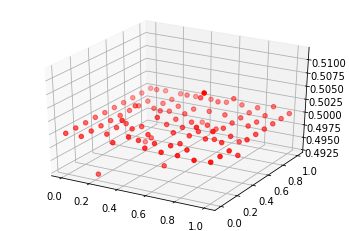

In [1613]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1_test, x2_test, model.predict([x1_test,x2_test])[0], c='r', marker='o')

In [1587]:
model.fit([x1_test,x2_test],labels,epochs=100,verbose=1)

Epoch 1/100
100/100 [==============================] - 9s 91ms/step - loss: 258.0101 - loss_loss: 258.0101 - loss_acc: 0.5500
Epoch 2/100
100/100 [==============================] - 0s 239us/step - loss: 142.3240 - loss_loss: 142.3240 - loss_acc: 0.5900
Epoch 3/100
100/100 [==============================] - 0s 239us/step - loss: 71.1403 - loss_loss: 71.1403 - loss_acc: 0.6100
Epoch 4/100
100/100 [==============================] - 0s 258us/step - loss: 33.7258 - loss_loss: 33.7258 - loss_acc: 0.6500
Epoch 5/100
100/100 [==============================] - 0s 229us/step - loss: 7.6669 - loss_loss: 7.6669 - loss_acc: 0.6300
Epoch 6/100
100/100 [==============================] - 0s 239us/step - loss: 4.7631 - loss_loss: 4.7631 - loss_acc: 0.6900
Epoch 7/100
100/100 [==============================] - 0s 263us/step - loss: 2.5838 - loss_loss: 2.5838 - loss_acc: 0.7100
Epoch 8/100
100/100 [==============================] - ETA: 0s - loss: 4.5157 - loss_loss: 4.5157 - loss_acc: 0.65 - 0s 269us/st

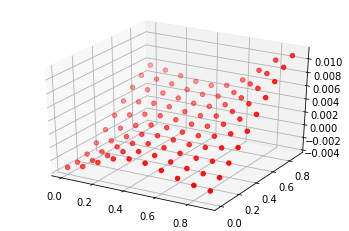

In [802]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1_test, x2_test, model.predict([x1_test,x2_test])[1], c='r', marker='o')

# Graveyard

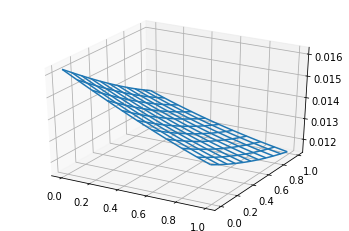

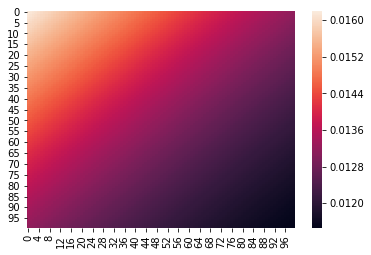

In [489]:
u = pre_ans[0].reshape(100,100)
grad = pre_ans[1].reshape(100,100)

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

x1plot=np.tile(np.arange(0.0,1.0,0.01) ,(100,1))
x2plot=np.transpose(x1plot)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(x1plot, x2plot, u, rstride=10, cstride=10)
plt.show()

ax = sns.heatmap(u)
plt.show()

In [490]:
losses = {
	"Output": "mean_squared_error",
}

model.compile(loss=losses, optimizer='adam', metrics=['accuracy'])


C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Output "functionvalue" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "functionvalue" during training.
  """
C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Output "Laplacian" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "Laplacian" during training.
  """


In [492]:
import math

# create interior points and boundary points to train on.
nexamples = 100000

#hyperparameters:
theta = 0.0 #theta proportion of interior points, (1-theta) proportion of boundary points.

#interior:
x1_interior = np.random.random((math.floor(nexamples*theta), 1))
x2_interior = np.random.random((math.floor(nexamples*theta), 1))
BC_interior = np.zeros((math.floor(nexamples*theta),1), dtype=int)
labels_interior = np.zeros((math.floor(nexamples*theta),1))

#bc: (on a rectangular grid (]0,1[x]0,1[) )
x1_data_bc1 = np.random.random((math.floor(nexamples*(1.0-theta)/4.0), 1))
x2_data_bc1 = np.zeros((math.floor(nexamples*(1.0-theta)/4.0),1))
labels_bc1 = np.zeros((math.floor(nexamples*(1.0-theta)/4.0),1))
BC_bc1 = np.ones((math.floor(nexamples*(1.0-theta)/4.0),1), dtype=int)

x1_data_bc2 = np.random.random((math.floor(nexamples*(1.0-theta)/4.0), 1))
x2_data_bc2 = np.ones((math.floor(nexamples*(1.0-theta)/4.0),1))
labels_bc2 = np.zeros((math.floor(nexamples*(1.0-theta)/4.0),1))
BC_bc2 = np.ones((math.floor(nexamples*(1.0-theta)/4.0),1), dtype=int)

x1_data_bc3 = np.zeros((math.floor(nexamples*(1.0-theta)/4.0),1))
x2_data_bc3 = np.random.random((math.floor(nexamples*(1.0-theta)/4.0), 1))
labels_bc3 = np.ones((math.floor(nexamples*(1.0-theta)/4.0),1))
BC_bc3 = np.ones((math.floor(nexamples*(1.0-theta)/4.0),1), dtype=int)

x1_data_bc4 = np.ones((math.floor(nexamples*(1.0-theta)/4.0),1))
x2_data_bc4 = np.random.random((math.floor(nexamples*(1.0-theta)/4.0), 1))
labels_bc4 = np.ones((math.floor(nexamples*(1.0-theta)/4.0),1))
BC_bc4 = np.ones((math.floor(nexamples*(1.0-theta)/4.0),1), dtype=int)

#concatenate to one dataset:
x1=np.concatenate((x1_interior, x1_data_bc1, x1_data_bc2, x1_data_bc3, x1_data_bc4), axis=0)
x2=np.concatenate((x2_interior, x2_data_bc1, x2_data_bc2, x2_data_bc3, x2_data_bc4), axis=0)
BC=np.concatenate((BC_interior, BC_bc1, BC_bc2, BC_bc3, BC_bc4), axis=0)
labels=np.concatenate((labels_interior, labels_bc1, labels_bc2, labels_bc3, labels_bc4), axis=0)
model.fit([x1,x2,BC],labels,epochs=5, batch_size=1000)

Epoch 1/5
100000/100000 [==============================] - 1s 13us/step - loss: 0.2461 - Output_loss: 0.2461 - Output_acc: 0.5525
Epoch 2/5
100000/100000 [==============================] - 1s 14us/step - loss: 0.2437 - Output_loss: 0.2437 - Output_acc: 0.5457
Epoch 3/5
100000/100000 [==============================] - 1s 14us/step - loss: 0.2405 - Output_loss: 0.2405 - Output_acc: 0.5466
Epoch 4/5
100000/100000 [==============================] - 1s 13us/step - loss: 0.2359 - Output_loss: 0.2359 - Output_acc: 0.5365
Epoch 5/5
100000/100000 [==============================] - 1s 14us/step - loss: 0.2306 - Output_loss: 0.2306 - Output_acc: 0.5531


In [2241]:
model.get_weights()[0]

array([[0.8533035 ],
       [0.8402502 ],
       [0.13258654],
       [0.84786326],
       [0.13228358],
       [0.132516  ],
       [0.13227643],
       [0.44884804],
       [0.25183287],
       [0.13224122],
       [0.35732484],
       [0.25184593],
       [0.25181282],
       [0.1322589 ],
       [1.0220537 ],
       [0.25185522],
       [0.13211773],
       [0.73255736],
       [0.25181574],
       [0.13255733],
       [0.8440362 ],
       [0.346879  ],
       [0.7323681 ],
       [0.8504373 ],
       [0.84501827],
       [0.84079367],
       [0.13172093],
       [0.44366077],
       [0.48889896],
       [0.34667987],
       [0.3463591 ],
       [0.84725887],
       [0.7323853 ],
       [0.8349059 ],
       [0.8390503 ],
       [0.2517138 ],
       [0.8442264 ],
       [0.73213506],
       [0.13222712],
       [0.13223094],
       [0.7320221 ],
       [0.732689  ],
       [0.42972857],
       [0.55743724],
       [0.84318334],
       [0.38163012],
       [0.8406213 ],
       [0.841

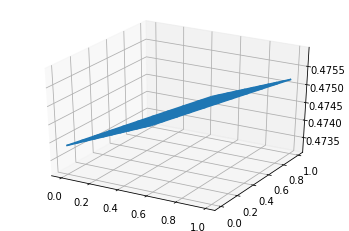

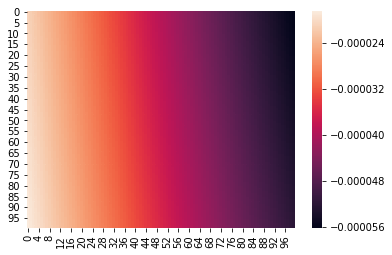

In [475]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

post_ans = model.predict( [x1_test, x2_test, BC_test], steps = 1 )
u = post_ans[0].reshape(100,100)
grad = post_ans[1].reshape(100,100)

x1plot=np.tile(np.arange(0.0,1.0,0.01) ,(100,1))
x2plot=np.transpose(x1plot)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(x1plot, x2plot, u, rstride=10, cstride=10)
plt.show()

ax = sns.heatmap(grad)
plt.show()

In [474]:
grad

array([[-2.0844975e-05, -2.1222890e-05, -2.1600508e-05, ...,
        -5.5466371e-05, -5.5795925e-05, -5.6124820e-05],
       [-2.0821268e-05, -2.1199048e-05, -2.1576538e-05, ...,
        -5.5425389e-05, -5.5754717e-05, -5.6083394e-05],
       [-2.0797492e-05, -2.1175154e-05, -2.1552496e-05, ...,
        -5.5384313e-05, -5.5713437e-05, -5.6041907e-05],
       ...,
       [-1.8356703e-05, -1.8719762e-05, -1.9082421e-05, ...,
        -5.1182640e-05, -5.1490853e-05, -5.1798364e-05],
       [-1.8329914e-05, -1.8692795e-05, -1.9055286e-05, ...,
        -5.1136311e-05, -5.1444280e-05, -5.1751544e-05],
       [-1.8303101e-05, -1.8665824e-05, -1.9028137e-05, ...,
        -5.1089923e-05, -5.1397674e-05, -5.1704730e-05]], dtype=float32)

In [479]:
model.get_weights()

[array([[-0.07877899,  0.02857952, -0.08733317, -0.05328723,  0.03751148,
         -0.0035272 ,  0.0034011 ,  0.02036109,  0.05039605,  0.08187934,
         -0.03301309,  0.01507246,  0.03926967, -0.0054754 ,  0.06117326,
          0.01815764, -0.04515646, -0.06575437, -0.00310918, -0.06241128,
          0.12430318,  0.02359621, -0.07063328,  0.01424535, -0.02720166,
          0.00375348, -0.01004155,  0.01306699, -0.02032447,  0.01917587,
         -0.07983478,  0.03987288, -0.11372261, -0.03550596, -0.0090245 ,
         -0.05524523, -0.11351965,  0.01582579, -0.0202599 ,  0.02234505,
          0.09682925,  0.02845044, -0.0966949 , -0.08766605,  0.02089771,
         -0.0228591 ,  0.05327751,  0.01095653, -0.07718241,  0.05455405,
         -0.00654163,  0.04877005, -0.06539116,  0.04408176, -0.00896797,
          0.11418717,  0.07270329,  0.02958302, -0.03156521, -0.06067498,
          0.03608618, -0.02356444,  0.00220818,  0.0554113 ,  0.00340814,
         -0.03353201, -0.03132417, -0.